# Лабораторная 1. Очистка набора данных

Отбор признаков - важная задача перед обучением модели машинного обучения. Признаки отбираются чаще всего вручную на основании описательной статистики, тепловой карты, показывающей линейную корреляцию и важности признаков. Никогда не смотрят только на что-то одно, всегда признаки рассматривают с разных сторон.

# Подключение модулей

Для определения важности признаков можно использовать вектор feature_importance, которые строится с помощью Random Forest. При этом для задач регрессии необходимо подключать именно RandomForestRegressor, для задач классификации - RandomForestClassifier

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных (регрессия)

В данной задаче у нас 28 признаков и 2 целевые переменные (G_total и КГФ). И это вносит дополнительную сложность, так как первая целевая переменная с большим количество пропусков.

In [4]:
df = pd.read_excel('1. Data.xlsx', sheet_name='VU')

In [5]:
df

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,...,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,53.0,31.7,...,45.25,56.5,NaN,93.6,0.806017,801.0,1000.0,0.669449,2.782623,311.9094
1,3576.3,9.53,233.500000,364.6,101.300000,249.0,338.1,102.400,58.8,37.6,...,45.25,56.5,NaN,92.9,0.806017,801.0,1000.0,0.669449,3.697781,288.6003
2,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,63.6,42.8,...,45.25,56.5,NaN,91.4,0.806017,801.0,1000.0,0.669449,4.515073,248.7906
3,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,64.7,46.2,...,45.25,56.5,NaN,89.2,0.806017,801.0,1000.0,0.669449,5.217673,223.5591
4,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,64.0,49.4,...,45.25,56.5,NaN,89.7,0.806017,801.0,1000.0,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,65.0,45.8,...,35.28,40.5,41.6,94.4,NaN,782.0,NaN,0.660000,NaN,153.0000
89,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,66.9,49.8,...,35.28,40.5,41.6,94.0,NaN,782.0,NaN,0.660000,NaN,147.0000
90,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,51.0,NaN,...,33.21,NaN,NaN,89.9,NaN,779.6,NaN,0.668000,NaN,182.0000
91,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,60.0,NaN,...,33.21,NaN,NaN,90.8,NaN,779.6,NaN,0.668000,NaN,145.0000


# Описательная статистика

Описательная статистика для непрерывных и категориальных признаках отличается.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

In [57]:
df.describe()

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ
count,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,60.000000,90.000000,93.000000,93.000000,93.000000,93.000000,89.000000,93.000000,93.000000,93.000000,93.000000,88.000000,81.000000,64.000000,93.000000,93.000000,93.000000,23.000000,93.000000
mean,3524.086667,10.951183,228.293412,331.762255,99.860962,227.837817,330.334444,98.005453,56.172043,43.091667,104.961400,39.798184,394.402772,99.909533,2.132827,417.021121,3282.971050,164.151613,2.163441,52.703325,40.682881,50.943684,50.773438,95.162366,780.847527,0.665260,5.742359,201.705968
std,144.474862,2.423172,41.897238,56.481235,7.300663,41.814527,56.357493,12.425851,11.250781,19.602337,1.250941,8.937669,150.354801,49.140664,1.874972,157.746532,1353.043667,85.225100,1.903132,12.149424,5.374353,4.378416,4.006591,5.136060,62.795111,0.020485,2.112717,49.253925
min,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,100.210000,16.204686,128.365641,33.629767,0.000000,136.815245,884.000000,59.800000,0.000000,30.000000,29.170000,39.900000,41.600000,85.500000,186.000000,0.570000,2.782623,131.000000
25%,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,33.300000,104.525000,33.688653,287.950295,69.900000,0.700000,306.243434,2223.000000,116.800000,0.700000,44.200000,37.210000,48.300000,49.425000,90.700000,782.000000,0.660000,4.381813,164.000000
50%,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,105.110000,40.519491,383.719622,89.800000,1.400000,401.391397,3112.000000,143.500000,1.400000,56.800000,39.466050,50.800000,50.900000,94.200000,787.000000,0.667000,5.250915,192.000000
75%,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,46.375000,105.567500,47.800000,489.673000,117.600000,3.200000,509.046953,4165.000000,185.200000,3.300000,63.500000,42.860000,55.400000,52.700000,99.800000,793.700000,0.679000,6.125723,224.000000
max,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,107.071000,55.513904,846.816143,302.621077,8.340288,896.908271,6943.100000,492.800000,8.100000,72.539800,53.270000,56.700000,56.800000,104.000000,801.000000,0.684660,10.931155,385.415949


Стандартные функции pandas не выводят всю необходимую описательную статистику, поэтому создадим свою таблицу с описательной статистикой. Для удобства закрасим признаки с единичной мощностью и большим количеством пропусков, чтобы потом их было легче удалить.

In [8]:
C=len(df.columns)
L=len(df.index)
CN=df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df.min() #минимум
Q1=df.quantile(q=0.25) #первый квартиль
MA=df.mean() #среднее значение
ME=df.median() #медиана
Q3=df.quantile(q=0.75) #третий квартиль
MX=df.max() #максимум
ST=df.std() #стандартное отклонение
P=df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

In [10]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1= (
    f.style
    .apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None)))
    .apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
    .apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
    .apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
)
f1

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
Количество,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,60.000000,90.000000,93.000000,93.000000,93.000000,93.000000,89.000000,93.000000,93.000000,93.000000,93.000000,88.000000,81.000000,64.000000,93.000000,23.000000,93.000000,23.000000,93.000000,23.000000,93.000000
Процент пропусков,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,35.483871,3.225806,0.000000,0.000000,0.000000,0.000000,4.301075,0.000000,0.000000,0.000000,0.000000,5.376344,12.903226,31.182796,0.000000,75.268817,0.000000,75.268817,0.000000,75.268817,0.000000
Минимум,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,100.210000,16.204686,128.365641,33.629767,0.000000,136.815245,884.000000,59.800000,0.000000,30.000000,29.170000,39.900000,41.600000,85.500000,0.787416,186.000000,1000.000000,0.570000,2.782623,131.000000
Первый квартиль,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,33.300000,104.525000,33.688653,287.950295,69.900000,0.700000,306.243434,2223.000000,116.800000,0.700000,44.200000,37.210000,48.300000,49.425000,90.700000,0.787416,782.000000,1000.000000,0.660000,4.381813,164.000000
Среднее,3524.086667,10.951183,228.293412,331.762255,99.860962,227.837817,330.334444,98.005453,56.172043,43.091667,104.961400,39.798184,394.402772,99.909533,2.132827,417.021121,3282.971050,164.151613,2.163441,52.703325,40.682881,50.943684,50.773438,95.162366,0.807631,780.847527,1000.000000,0.665260,5.742359,201.705968
Медиана,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,105.110000,40.519491,383.719622,89.800000,1.400000,401.391397,3112.000000,143.500000,1.400000,56.800000,39.466050,50.800000,50.900000,94.200000,0.806017,787.000000,1000.000000,0.667000,5.250915,192.000000
Третий квартиль,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,46.375000,105.567500,47.800000,489.673000,117.600000,3.200000,509.046953,4165.000000,185.200000,3.300000,63.500000,42.860000,55.400000,52.700000,99.800000,0.821344,793.700000,1000.000000,0.679000,6.125723,224.000000
Максимум,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,107.071000,55.513904,846.816143,302.621077,8.340288,896.908271,6943.100000,492.800000,8.100000,72.539800,53.270000,56.700000,56.800000,104.000000,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949
Стандартное отклонение,144.474862,2.423172,41.897238,56.481235,7.300663,41.814527,56.357493,12.425851,11.250781,19.602337,1.250941,8.937669,150.354801,49.140664,1.874972,157.746532,1353.043667,85.225100,1.903132,12.149424,5.374353,4.378416,4.006591,5.136060,0.015076,62.795111,0.000000,0.020485,2.112717,49.253925
Мощность,20.000000,10.000000,87.000000,88.000000,91.000000,72.000000,89.000000,88.000000,51.000000,57.000000,68.000000,89.000000,93.000000,92.000000,77.000000,89.000000,92.000000,90.000000,42.000000,14.000000,21.000000,18.000000,13.000000,70.000000,6.000000,25.000000,1.000000,21.000000,23.000000,72.000000


Удалим признаки, у которых мощность равна 1 и пропусков слишком много

In [11]:
df=df.drop(['Ro_g', 'Ro_w'], axis=1)

# Тепловая карта

<Axes: >

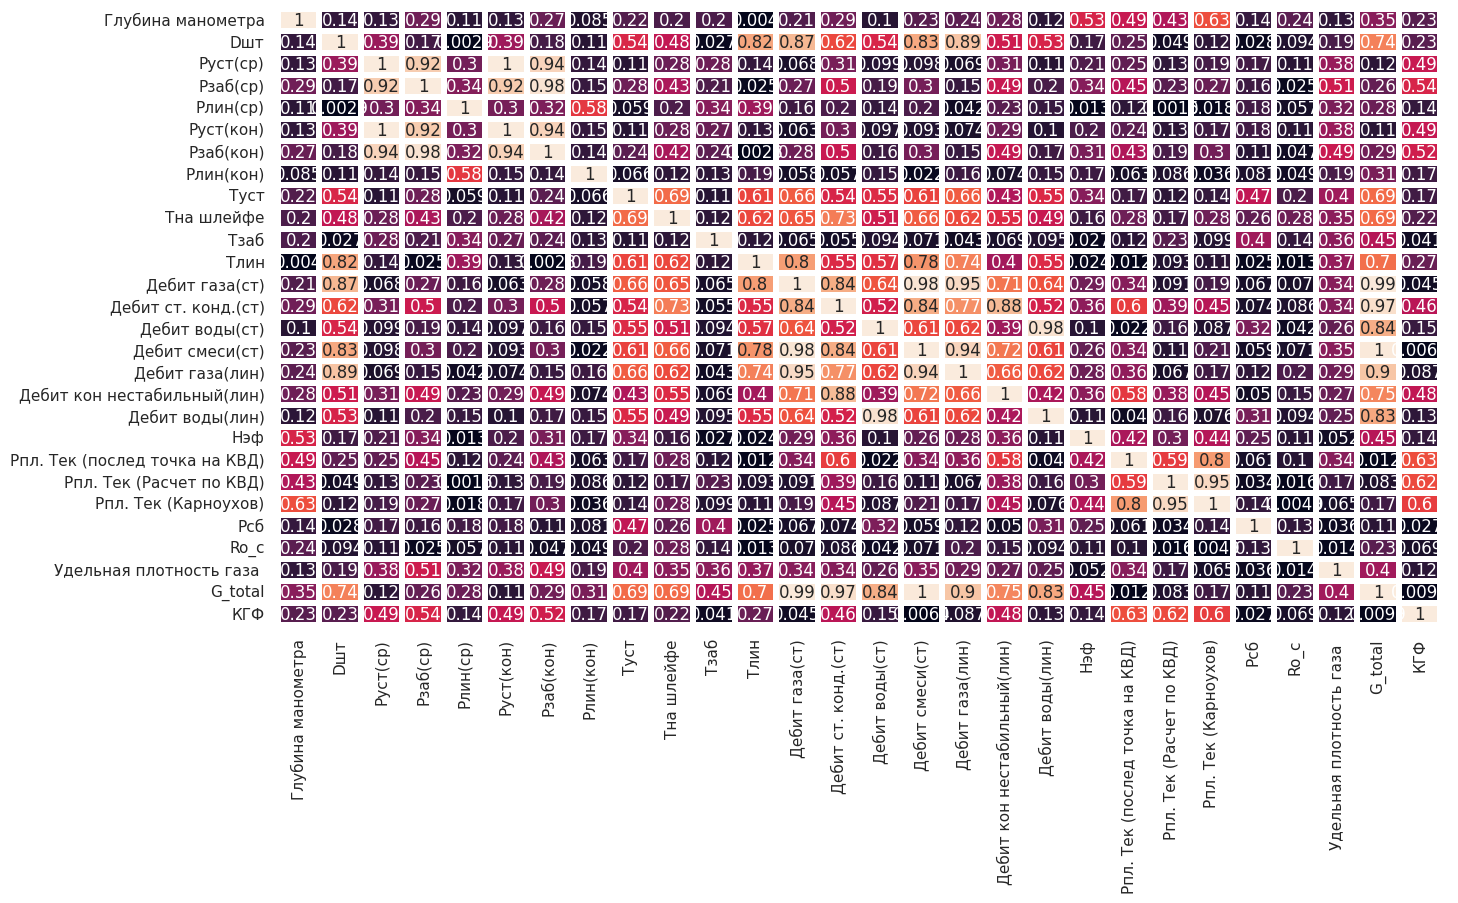

In [91]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr().abs(), annot=True, linewidths=3, cbar=False)

# Распределения

Построим графики распределения значений признаков. Столбцы гистограммы показывают эмпирическую частоту, но обратите внимание, что количество корзин (число столбцов) задано по молчанию, оно не выбирается самим алгоритмом. Слошная линия показывает теоретическую нормальную кривую. Дополнительно покажем линиями первый и третий квартили, медиану и среднее (позволяет наглядно увидеть ассиметрию). Также выведем пороги отсечения выбросов по интерквартильному размаху.
Единственный выброс, который здесь можно гарантированно увидеть, это слева у признака "Ro_c"

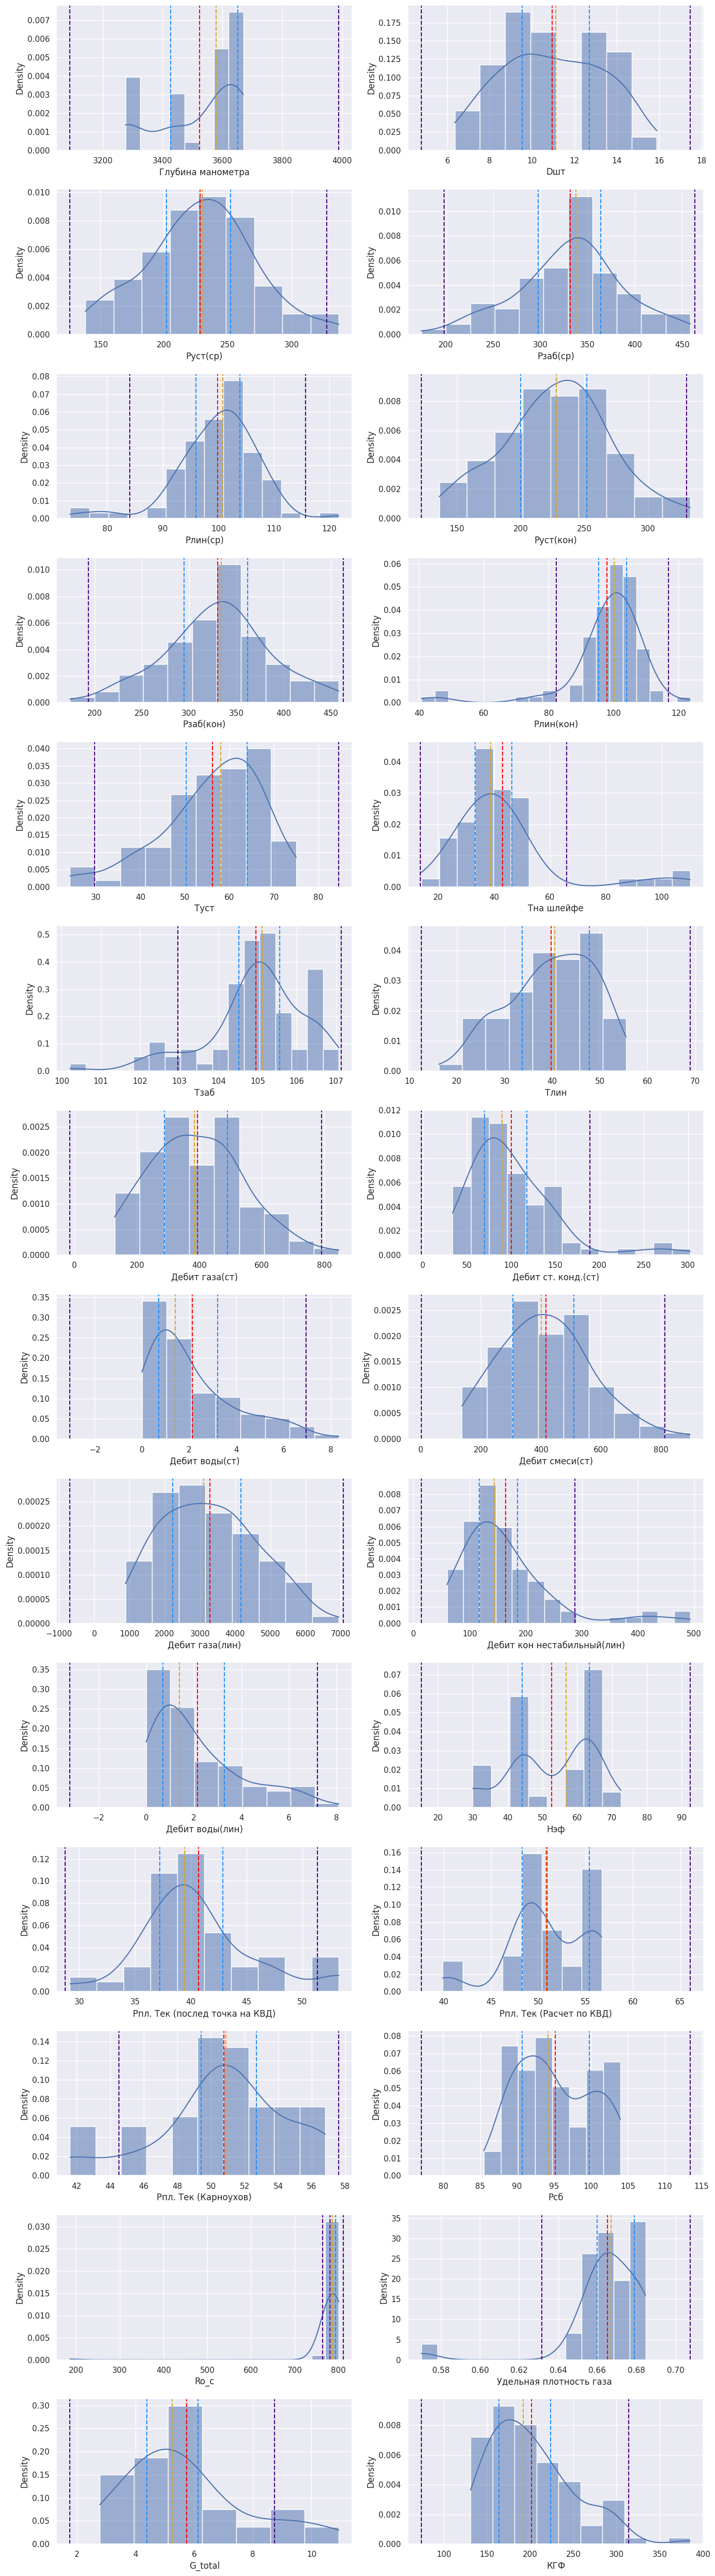

In [95]:
plt.figure(figsize=(14, 50))

for idx, i in enumerate(df.columns):
    plt.subplot(14, 2, idx + 1)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--') #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #медиана
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #третий квартиль
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr

plt.tight_layout()
plt.show()

У признака "Удельная плотность газа" пороги слишком далекие, что лишний раз иллюстрирует, что отсекать через интерквартильный размах можно только при близком к нормальному распределении. Однозначно сказать, что слева наблюдается выброс нельзя из-за малого размера выборки. Это вполне может быть состояние потока со скважины.

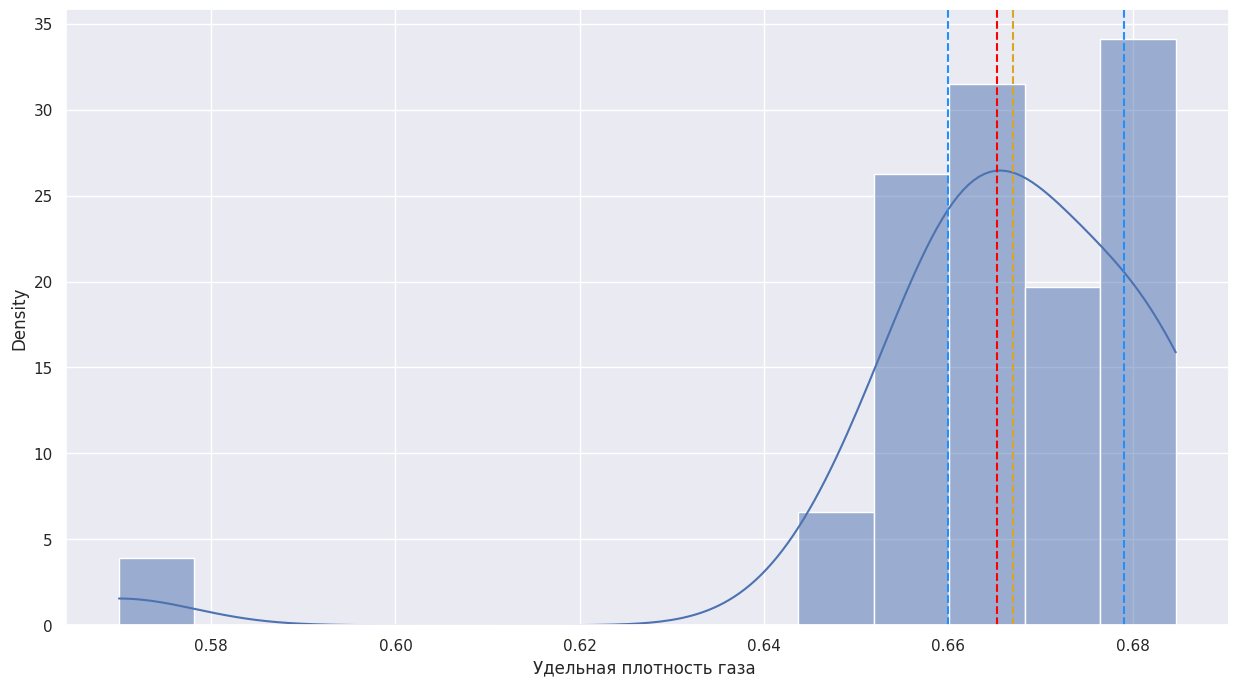

In [20]:
sns.histplot(df[df.columns[25]],kde=True,stat="density")
plt.axvline(f.iloc[3][df.columns[25]], color="dodgerblue", ls='--') #первый квартиль
plt.axvline(f.iloc[4][df.columns[25]], color="red", ls='--') #среднее
plt.axvline(f.iloc[5][df.columns[25]], color="goldenrod", ls='--') #медиана
plt.axvline(f.iloc[6][df.columns[25]], color="dodgerblue", ls='--') #третий квартиль

Также полезно посмотреть на диаграммы рассеяния, показывающие возможную зависимость между признаками. В нашем случае, посмотрим на связь между признаками и КГФ.

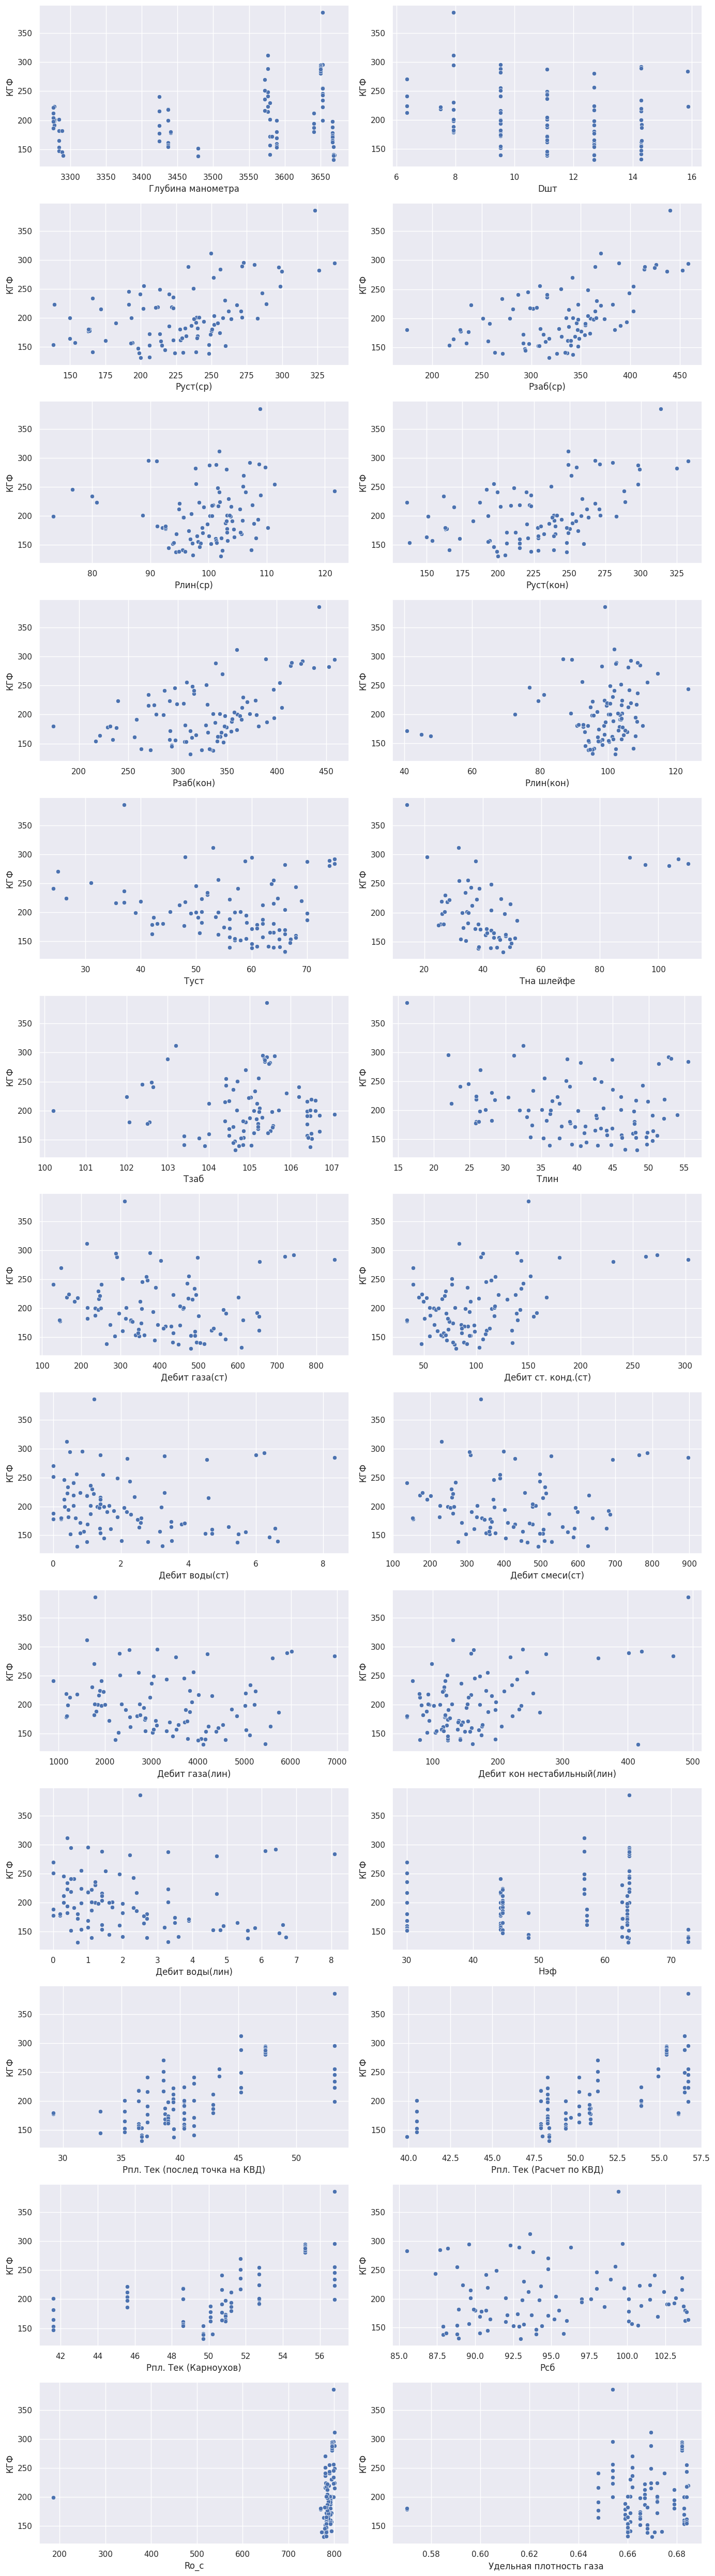

In [27]:
X1 = df.iloc[:, 0:26]

plt.figure(figsize=(14, 50))

for idx, i in enumerate(X1.columns):
    plt.subplot(13, 2, idx + 1)
    sns.scatterplot(data=df, y="КГФ", x=i)

plt.tight_layout()
plt.show()

По этим диаграммам, еще с большей уверенностью можно сказать, что "Глубина манометра", "Dшт" и "НЭФ" являются категориальными признаками. Вызывают вопросы все три "Pпл.тек".

# Важность признаков

Так как у нас задача регрессии, то можно использовать по построение вектора важности признаков из рандомизированного леса принятия решений. В качестве функции стоимости здесь лучше подходит MSE. sklearn не умеет работать с пропущеными значениями, поэтому для целей определения важности заполним пропуски значением -100, само значение лучше подбирать исходя из распределений признаков с пропусками. Это конечно дает смещение оценки, но в задаче отбора признаков мы этим можем пренебречь. При построении модели регрессии для решения задачи так делать не стоит.

In [28]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:26]
Y=df1.iloc[:, 26:28]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Axes: >

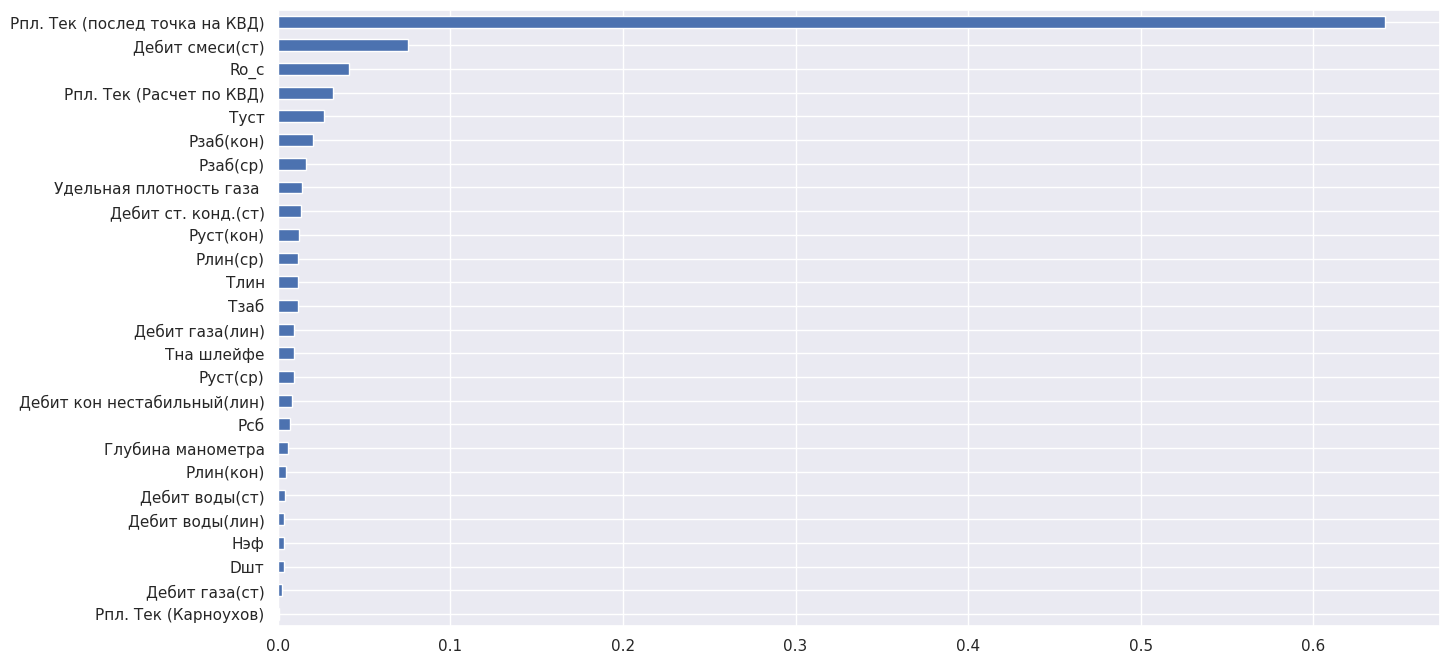

In [35]:
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')

# Собственный анализ

In [54]:
# Посчитаем importance через бустинги
import xgboost as xgb

dtrain = xgb.DMatrix(X, label=Y)
MODEL_PARAMS = {
    'objective': 'reg:squarederror',
    "booster": "gbtree",
    'tree_method': 'hist',
    'max_depth': 10,
    "lambda": 1e-3,
    'gamma': 1e-4,
    "alpha": 1e-3,
    "colsample_bytree": 0.5
}

model = xgb.train(
    MODEL_PARAMS, dtrain, 
    num_boost_round=100
)

<Axes: >

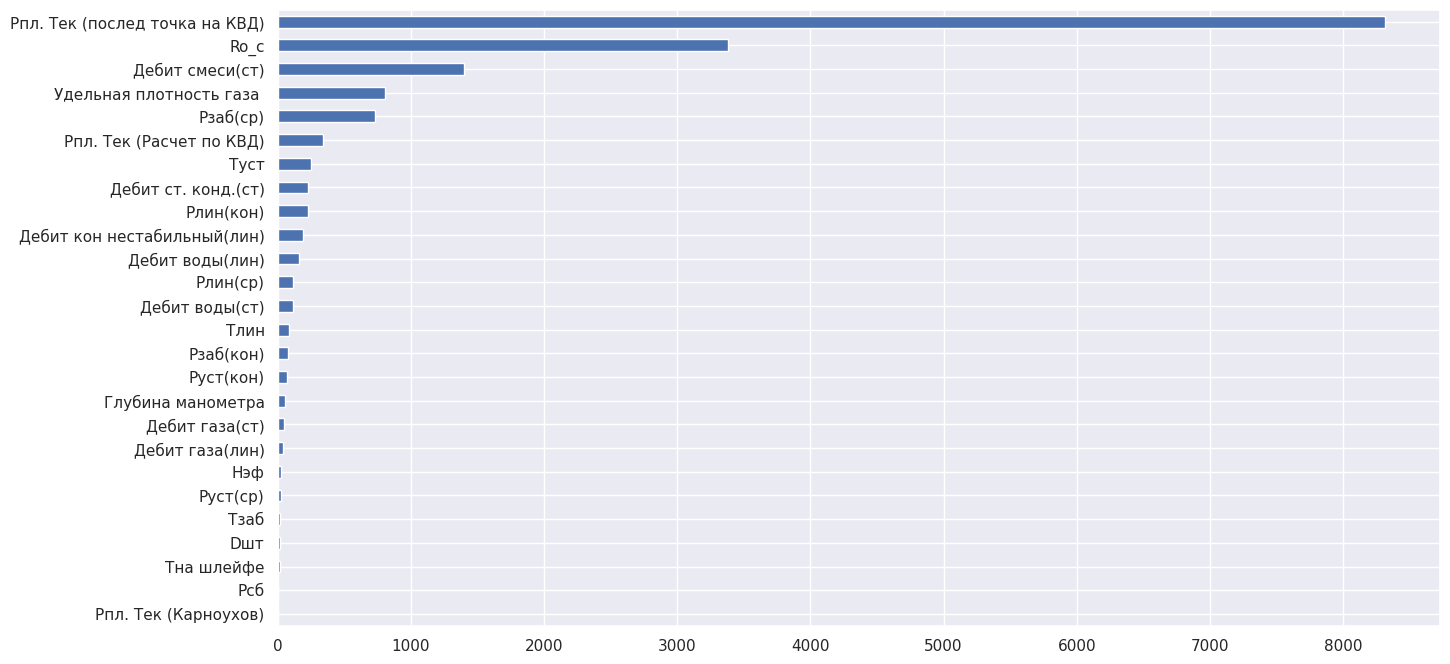

In [55]:
importance = model.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

feat_importances = pd.Series([i[1] for i in sorted_importance], index=[i[0] for i in sorted_importance])
feat_importances.sort_values().plot(kind='barh')

# Обработка набора данных

### Удалить строки, где обе целевых переменные пустые (и g-total и кгф)

In [64]:
target_cols = ['G_total', 'КГФ']

both_na_cond = df[target_cols[0]].isna() & df[target_cols[1]].isna()
df[both_na_cond] # Нет строк, где обе целевые переменные NaN. КГФ всегда заполнен

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ


### Пропуски заполнить NaN

In [77]:
# Посмотрим фичи с пропусками
features_info = f.T
features_info = features_info.loc[df.columns]
nan_features_info = features_info[features_info['Процент пропусков'] > 0][['Процент пропусков', 'Среднее', 'Медиана']]

nan_features_info.sort_values('Процент пропусков')

,Процент пропусков,Среднее,Медиана
Глубина манометра,3.225806,3524.086667,3579.000000
Рзаб(ср),3.225806,331.762255,337.789172
Рзаб(кон),3.225806,330.334444,334.250000
Тзаб,3.225806,104.961400,105.110000
Дебит смеси(ст),4.301075,417.021121,401.391397
Рпл. Тек (послед точка на КВД),5.376344,40.682881,39.466050
Рпл. Тек (Расчет по КВД),12.903226,50.943684,50.800000
Рпл. Тек (Карноухов),31.182796,50.773438,50.900000
Тна шлейфе,35.483871,43.091667,38.700000
G_total,75.268817,5.742359,5.250915


In [84]:
# Посмотрим на пропуски Рпл. Тек (послед точка на КВД) вместе с другими Рпл. Тек признаками
repl_tek_cols = ['Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)']

df[df['Рпл. Тек (послед точка на КВД)'].isna()][repl_tek_cols]

,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов)
15,NaN,49.7,NaN
32,NaN,NaN,NaN
43,NaN,NaN,NaN
46,NaN,NaN,NaN
92,NaN,39.9,NaN


Исходя из графиков распределнений и визульного просмотра самих данных, видно, что Рпл. Тек (послед точка на КВД) сильно отличается от Рпл. Тек (Расчет по КВД) и Рпл. Тек (Карноухов)

Так что не будем заполнять пропуски в Рпл. Тек (послед точка на КВД) данными из Рпл. Тек (Расчет по КВД) и Рпл. Тек (Карноухов)

Вместо этого будем заполнять этот признак средним - по графику распределения видно, что распределние признака около нормальное

In [85]:
# Так как оставляем только Рпл. Тек (послед точка на КВД), остальные признаки Рпл. Тек не заполняем 
# Заполним пропуски у признаков, у которых процент пропусков не более 30%
fill_features = set(nan_features_info[nan_features_info['Процент пропусков'] <= 30].index)
fill_features = fill_features - {'Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)', 'G_total'}
fill_features

{'Глубина манометра',
 'Дебит смеси(ст)',
 'Рзаб(кон)',
 'Рзаб(ср)',
 'Рпл. Тек (послед точка на КВД)',
 'Тзаб'}

In [89]:
# По графикам распредлений видно, что для всех из этих признаков, кроме "Глубина манометра" распредление приблизительно нормальное
# Так что все эти признаки будем заполнять средним, а "Глубина манометра" - медианой

median_features = ["Глубина манометра"]

for col in fill_features:
    if col in median_features:
        df[col] = df[col].fillna(nan_features_info.loc[col]['Медиана'])
    else:
        df[col] = df[col].fillna(nan_features_info.loc[col]['Среднее'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               93 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        93 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       93 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            93 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

### Наиболее кореелируемые признаки с таргетом

In [94]:
df.corr().abs().loc['КГФ'].sort_values(ascending=False)

КГФ                               1.000000
Рпл. Тек (послед точка на КВД)    0.629747
Рпл. Тек (Расчет по КВД)          0.624269
Рпл. Тек (Карноухов)              0.596974
Рзаб(ср)                          0.538605
Рзаб(кон)                         0.515658
Руст(ср)                          0.494718
Руст(кон)                         0.488682
Дебит кон нестабильный(лин)       0.475444
Дебит ст. конд.(ст)               0.458866
Tлин                              0.270998
Dшт                               0.231636
Глубина манометра                 0.229637
Тна шлейфе                        0.219367
Туст                              0.170377
Рлин(кон)                         0.167872
Дебит воды(ст)                    0.150919
Pлин(ср)                          0.141389
Нэф                               0.140222
Дебит воды(лин)                   0.125959
Удельная плотность газа           0.115922
Дебит газа(лин)                   0.086603
Ro_c                              0.068622
Дебит газа(

### Борьба с выборасми

In [99]:
# Судя по графикам вопросы вызывает Ro_c и Удельная плотность газа, посмотрим подробнее
df[df['Ro_c'] < f['Ro_c']['Среднее'] - 3 * f['Ro_c']['Стандартное отклонение']]

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ
76,3277.8,9.53,282.69675,373.7,103.8,282.69675,379.6,103.5,39.0,NaN,106.4,40.1,354.224,89.8,3.2,373.31868,1192.0,82.6,0.8,44.5,40.35,53.9,52.7,101.5,186.0,0.672,NaN,199.0


In [108]:
# Видно, что для Ro_c такое эксримально низкое значение, вероятно, является выбросом
# Учитывая тот факт, что значение целевой переменной, как и остальных выглядит правдоподобными и близкими к среднему
# Возможно, исключая значение признака Глубина манометра, который также один из минимальных, но и признак распределён не нормально
# Исходя из этого строку можно удалить, так как сам по себе признак является весьма хорошим

df = df[df['Ro_c'] > f['Ro_c']['Среднее'] - 3 * f['Ro_c']['Стандартное отклонение']]

In [109]:
# Теперь посмотрим на Удельную плотность газа
df[df['Удельная плотность газа '] < f['Удельная плотность газа ']['Среднее'] - 3 * f['Удельная плотность газа ']['Стандартное отклонение']]

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ
72,3440.0,7.94,163.615385,174.00,92.052690,163.0,174.0,90.945,44.0,25.6,102.550,25.942778,145.678508,33.939942,0.239244,154.323251,1187.0,60.9,0.2,44.2,29.17,56.1,NaN,90.0,770.1,0.57,NaN,180.0
73,3440.0,7.94,163.600000,228.46,92.587935,164.0,229.1,92.642,42.0,24.8,102.507,25.807612,145.723459,33.629767,0.236990,154.289197,1168.0,60.1,0.2,44.2,29.17,56.1,NaN,90.4,770.1,0.57,NaN,178.0
74,3440.0,7.94,163.000000,228.10,92.632340,163.0,231.4,94.154,43.0,26.6,102.068,26.238924,144.771189,33.849138,0.237655,153.392802,1172.0,59.8,0.2,44.2,29.17,56.1,NaN,90.7,770.1,0.57,NaN,180.0


np.float64(0.01291719006157214)

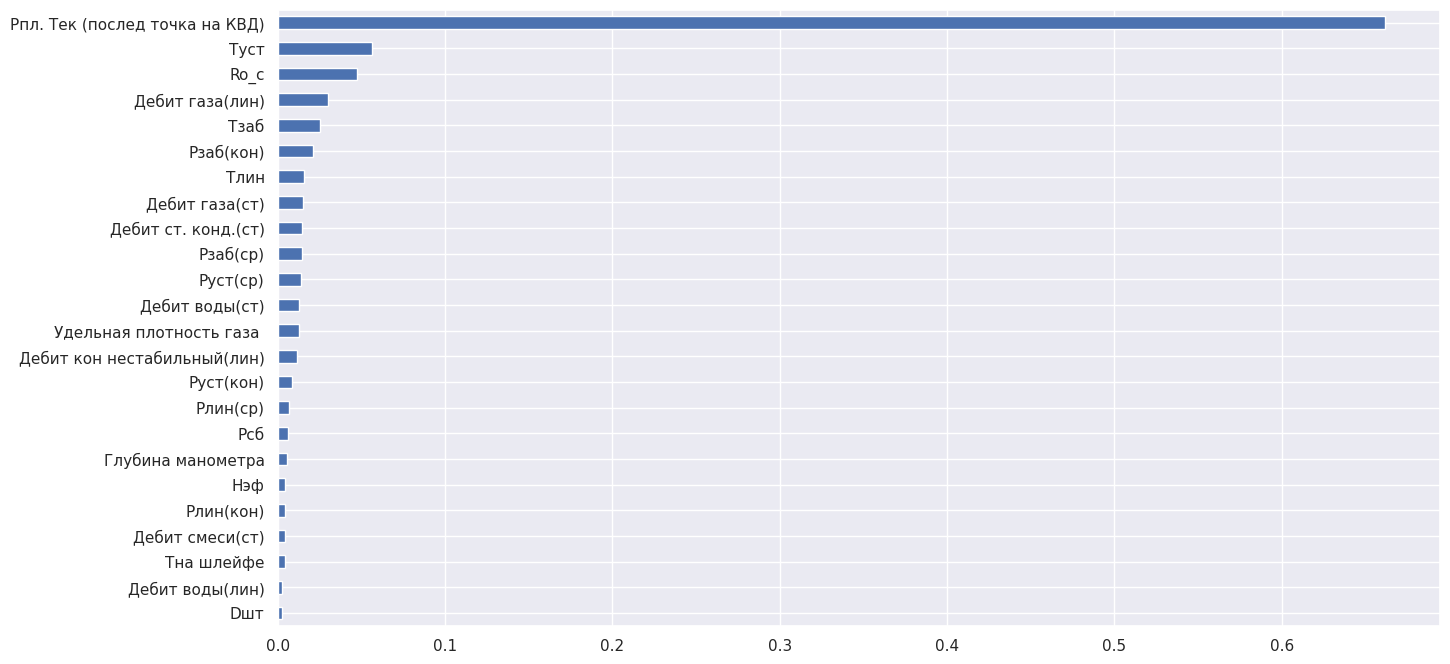

In [116]:
# Можно заметить, что значения многих признаков полностью совпадают или очень близки, как и значение целевой переменной
# Но при этом некоторые признаки отличаются:
# 1. Рзаб(ср) - 174 и 228 (x2)
# 2. Рзаб(кон) - 174 и ~230 (x2)
# 3. Рлин(кон) - 91, 92.6, 94
# 4. Туст - 42, 43, 44
# 5. Тна шлейфе - 24.8, 25.6, 26.6
# Что ставит под вопрос содержание этих признаков и стоит проанализировать их подробнее в дальнейшем

# Проверим вырастит ли information gain для Удельной плотности газа, если удалить выбросы
df1 = df.drop([72, 73, 74]).drop(['Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)'], axis=1).fillna(-100)
X = df1.drop(target_cols, axis=1)
Y = df1[target_cols]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
feat_importances['Удельная плотность газа ']

Важность признака не увеличилась, но и не уменьшилась, так что можно оставить эти строки

In [117]:
# Проверим отдельно корреляцию 5 признаков указанных выше с таргетами
check_features = ['Рзаб(ср)', 'Рзаб(кон)', 'Рлин(кон)', 'Туст', 'Тна шлейфе']
check_features += target_cols

df_corr = df.corr().abs()

df_corr.loc[check_features, check_features]

,Рзаб(ср),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,G_total,КГФ
Рзаб(ср),1.000000,0.977832,0.145520,0.302123,0.425362,0.259723,0.540765
Рзаб(кон),0.977832,1.000000,0.132076,0.258388,0.417444,0.292065,0.518458
Рлин(кон),0.145520,0.132076,1.000000,0.059082,0.123170,0.312419,0.168322
Туст,0.302123,0.258388,0.059082,1.000000,0.690653,0.689091,0.173536
Тна шлейфе,0.425362,0.417444,0.123170,0.690653,1.000000,0.690502,0.219367
G_total,0.259723,0.292065,0.312419,0.689091,0.690502,1.000000,0.009890
КГФ,0.540765,0.518458,0.168322,0.173536,0.219367,0.009890,1.000000


In [121]:
# Общая корреляция с заполненными пропусками, значения выше 0.8
df_corr[df_corr > 0.8]

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ
Глубина манометра,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dшт,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.822739,0.865877,NaN,NaN,0.831119,0.898301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Руст(ср),NaN,NaN,1.000000,0.919256,NaN,0.998470,0.939020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рзаб(ср),NaN,NaN,0.919256,1.000000,NaN,0.917113,0.977832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pлин(ср),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Руст(кон),NaN,NaN,0.998470,0.917113,NaN,1.000000,0.937457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рзаб(кон),NaN,NaN,0.939020,0.977832,NaN,0.937457,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рлин(кон),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Туст,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тна шлейфе,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# Видно, что признаки Руст(ср), Рзаб(ср), Руст(кон) и Рзаб(кон)	сильно скоррелированы
# А также признаки Дебит газа(ст), Дебит ст. конд.(ст), Дебит смеси(ст), Дебит газа(лин)
# А также признаки Дебит воды(лин) и Дебит воды(ст)	

# Ещё можно заметиить, что признак Dшт коррелирует с признаками Tлин, Дебит газа(ст), Дебит смеси(ст) и Дебит газа(лин)
# Сам по себе признак Dшт вызывает вопросы, так что его пока оставим
# Остальные скоррелированные группы признаков преобразуем в один с помощью PCA

from sklearn.decomposition import PCA

features_groups = {
    "Руст_заб": ["Руст(ср)", 'Рзаб(ср)', "Руст(кон)", "Рзаб(кон)"],
    "Дебит_газа_конд_смеси": ["Дебит газа(ст)", "Дебит ст. конд.(ст)", "Дебит смеси(ст)", "Дебит газа(лин)"],
    "Дебит_воды": ["Дебит воды(лин)", "Дебит воды(ст)"]
}

pcas = {}

new_df = df.copy()

for feature_name, feature_group in features_groups.items():
    pca = PCA(n_components=1)
    pcas[feature_name] = pca
    
    new_df[feature_name] = pca.fit_transform(new_df[feature_group])
    new_df = new_df.drop(feature_group, axis=1)

new_df.head()

,Глубина манометра,Dшт,Pлин(ср),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит кон нестабильный(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ,Руст_заб,Дебит_газа_конд_смеси,Дебит_воды
0,3576.3,7.94,101.8,101.8,53.0,31.7,103.2,32.5,131.3,56.8,45.25,56.5,NaN,93.6,801.0,0.669449,2.782623,311.9094,57.343462,-1714.786465,-2.474735
1,3576.3,9.53,101.3,102.4,58.8,37.6,103.0,38.6,158.5,56.8,45.25,56.5,NaN,92.9,801.0,0.669449,3.697781,288.6003,35.194056,-1006.232643,-1.060556
2,3576.3,11.11,101.6,100.6,63.6,42.8,102.6,43.4,172.3,56.8,45.25,56.5,NaN,91.4,801.0,0.669449,4.515073,248.7906,-6.747193,-268.640765,-0.353467
3,3576.3,12.70,98.4,99.0,64.7,46.2,102.0,46.1,181.5,56.8,45.25,56.5,NaN,89.2,801.0,0.669449,5.217673,223.5591,-44.777444,521.076240,1.626383
4,3576.3,14.29,99.2,99.5,64.0,49.4,104.4,49.9,190.6,56.8,45.25,56.5,NaN,89.7,801.0,0.669449,5.765092,215.1486,-78.209034,1001.157320,3.536022


<Axes: >

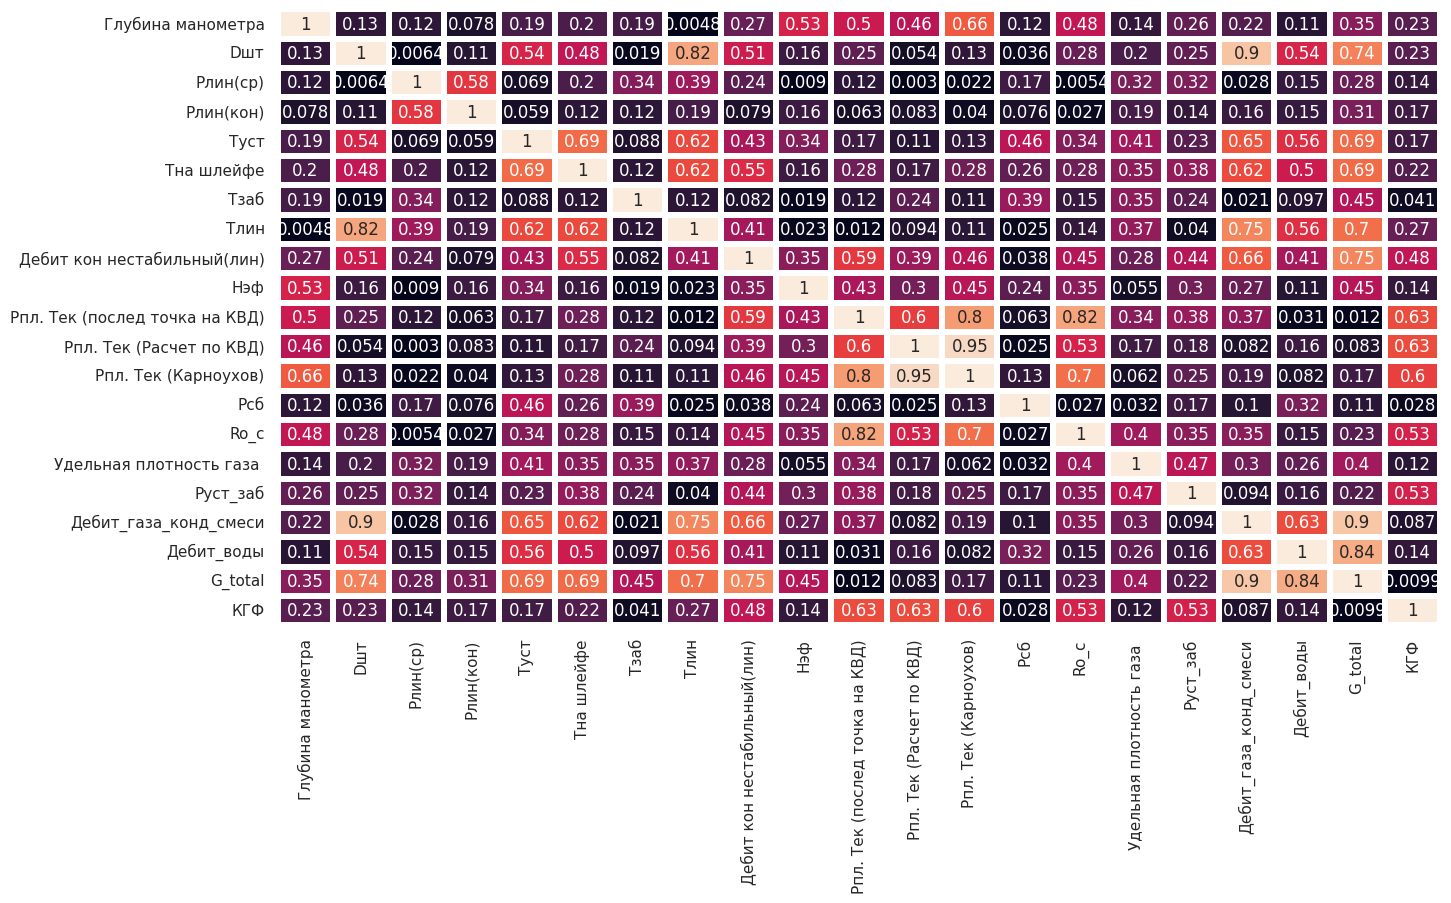

In [129]:
columns = [c for c in new_df.columns if c not in target_cols] + target_cols
new_df = new_df[columns]

new_df_corr = new_df.corr().abs()
sns.heatmap(new_df_corr, annot=True, linewidths=3, cbar=False)

<Axes: >

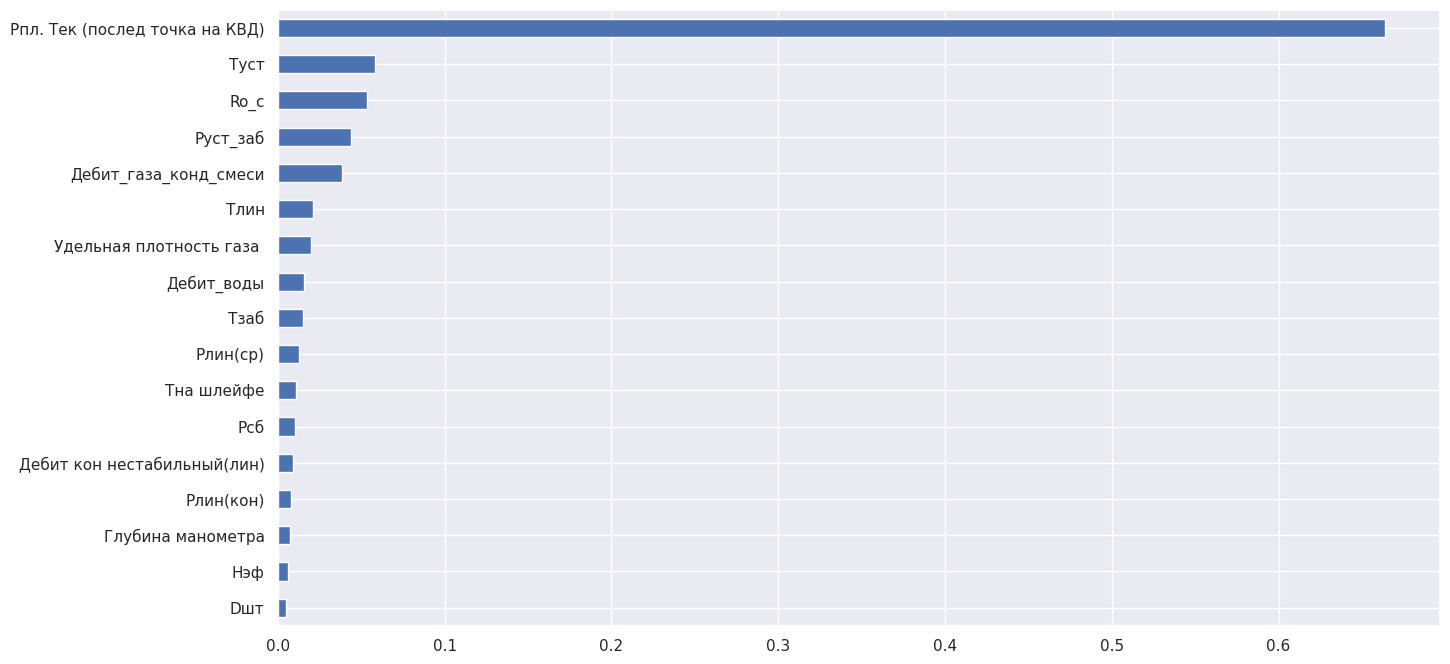

In [128]:
# Пересчитаем information gain
new_df1 = new_df.drop(['Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)'], axis=1).fillna(-100)
X = new_df1.drop(target_cols, axis=1)
Y = new_df1[target_cols]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')

# Выводы

Наша задача оставить признаки, которые помогут в решении задачи.
1) Из трех признаков "Pпл. Тек" можно оставить "Pпл. Тек (послед точка на КВД)". У него меньше всего пропусков, высокая важность и неплохая корреляция с "КГФ". Остальные два удаляем
2) Подозрителен параметр "Dшт"  - по сути он категориальный, но всё же имеет очень маленькую корреляцию с таргетом и важность, а также коррелирует с некоторыми из признаков, так что его можно также удалить 
3) Признак Нэф также выглядит как категориальный, но слабоо коррелирует с другими переменными, возможно, его можно оставить с преобразованием его в категории
4) Можно удалить признак Рсб из-за его отсуствующей корреляции с таргетом и низкой важности